In [1]:
using Pkg; Pkg.activate("."); 
using SpectrumImage
import Markdown
Base.showable(::MIME"text/markdown", ::Markdown.MD) = false;

  Activating project at `~/Documents/PhD/spectra_image/test`


# Reading the Spectrum

Read an example spectrum. You can specify `skipstart=N` to skip the first N lines of the file. If the file is `,` separated, you can pass ',' as second argument. For more information search for `julia readdlm` or do `?read_spectrum`

In [2]:
?read_spectrum

search: read_spectrum spectrum



  readdlm(source, T::Type; options...)

  The columns are assumed to be separated by one or more whitespaces. The end
  of line delimiter is taken as \n.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> using DelimitedFiles
  
  julia> x = [1; 2; 3; 4];
  
  julia> y = [5; 6; 7; 8];
  
  julia> open("delim_file.txt", "w") do io
             writedlm(io, [x y])
         end;
  
  julia> readdlm("delim_file.txt", Int64)
  4×2 Matrix{Int64}:
   1  5
   2  6
   3  7
   4  8
  
  julia> readdlm("delim_file.txt", Float64)
  4×2 Matrix{Float64}:
   1.0  5.0
   2.0  6.0
   3.0  7.0
   4.0  8.0
  
  julia> rm("delim_file.txt")

  ────────────────────────────────────────────────────────────────────────────

  readdlm(source, delim::AbstractChar, T::Type; options...)

  The end of line delimiter is taken as \n.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> using DelimitedFiles
  
  julia> x = [1; 2; 3; 4];
  
  julia> y = [1.1; 2.2; 3.3; 4.4];
  
  julia> open("delim_file.txt", "w") do io
             writedlm(io, [x y], ',')
         end;
  
  julia> readdlm("delim_file.txt", ',', Float64)
  4×2 Matrix{Float64}:
   1.0  1.1
   2.0  2.2
   3.0  3.3
   4.0  4.4
  
  julia> rm("delim_file.txt")

  ────────────────────────────────────────────────────────────────────────────

  readdlm(source; options...)

  The columns are assumed to be separated by one or more whitespaces. The end
  of line delimiter is taken as \n. If all data is numeric, the result will be
  a numeric array. If some elements cannot be parsed as numbers, a
  heterogeneous array of numbers and strings is returned.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> using DelimitedFiles
  
  julia> x = [1; 2; 3; 4];
  
  julia> y = ["a"; "b"; "c"; "d"];
  
  julia> open("delim_file.txt", "w") do io
             writedlm(io, [x y])
         end;
  
  julia> readdlm("delim_file.txt")
  4×2 Matrix{Any}:
   1  "a"
   2  "b"
   3  "c"
   4  "d"
  
  julia> rm("delim_file.txt")

  ────────────────────────────────────────────────────────────────────────────

  readdlm(source, delim::AbstractChar; options...)

  The end of line delimiter is taken as \n. If all data is numeric, the result
  will be a numeric array. If some elements cannot be parsed as numbers, a
  heterogeneous array of numbers and strings is returned.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> using DelimitedFiles
  
  julia> x = [1; 2; 3; 4];
  
  julia> y = [1.1; 2.2; 3.3; 4.4];
  
  julia> open("delim_file.txt", "w") do io
             writedlm(io, [x y], ',')
         end;
  
  julia> readdlm("delim_file.txt", ',')
  4×2 Matrix{Float64}:
   1.0  1.1
   2.0  2.2
   3.0  3.3
   4.0  4.4
  
  julia> z = ["a"; "b"; "c"; "d"];
  
  julia> open("delim_file.txt", "w") do io
             writedlm(io, [x z], ',')
         end;
  
  julia> readdlm("delim_file.txt", ',')
  4×2 Matrix{Any}:
   1  "a"
   2  "b"
   3  "c"
   4  "d"
  
  julia> rm("delim_file.txt")

  ────────────────────────────────────────────────────────────────────────────

  readdlm(source, delim::AbstractChar, eol::AbstractChar; options...)

  If all data is numeric, the result will be a numeric array. If some elements
  cannot be parsed as numbers, a heterogeneous array of numbers and strings is
  returned.

  ────────────────────────────────────────────────────────────────────────────

  readdlm(source, delim::AbstractChar, T::Type, eol::AbstractChar; header=false, skipstart=0, skipblanks=true, use_mmap, quotes=true, dims, comments=false, comment_char='#')

  Read a matrix from the source where each line (separated by eol) gives one
  row, with elements separated by the given delimiter. The source can be a
  text file, stream or byte array. Memory mapped files can be used by passing
  the byte array representation of the mapped segment as source.

  If T is a numeric type, the result is an array of that type, with any
  non-numeric elements as NaN for floating-point types, or zero. Other useful
  values of T include String, AbstractString, and Any.

  If header is true, the first row of data will be read as 

But you can use any kind of reader function in case this does not work. The code takes simple arrays as input

In [3]:
data = read_spectrum("KPNO_FTS_flux_2960_13000_Kurucz1984.txt")
@info typeof(data) size(data)

┌ Info: Matrix{Float64}
└   size(data) = (1138240, 2)


# Creating the Image

The final image is created using the `spectrum` function. Check out the documentation to see how to use is:

In [4]:
?spectrum

search: spectrum spectrum_gif read_spectrum selectdim SpectrumImage uperm isperm



  spectrum(λ, F; colormap="gist_rainbow", figsize=(9,6), rows=30, separator_width=1.5, color_spacing="index", unify_spacing=true, show_lambda_range=true, λ_UV=-1, λ_IR=-1, F_low=-1, F_high=-1, line_indicators=[], windows=nothing, window_gap_fraction=0.05, window_gap_color=[0,0,0], indicator_fontsize="small", units="AA", header=nothing, kwargs...)

  Create a 2D spectrum image from wavelength and Flux arrays. Wavelength will
  be used as the indicator for color, and should be chosen from red to blue. λ
  and F will be sorted automatically. More rows will increase the rows of the
  image.

  Kwargs will be passed to the plt.figure constructor. plt.figure and ax will
  be returned and can be used to add anything you want.

  By default, the entire colormap will be used from the red end of λ to the
  blue end. You can optically specify where the red part should stop (λ_IR)
  and where the violet part should be begin (λ_UV). Space before and after
  will be filled by the respective color.

  You can specify line_indicators in wavelength. At the corresponding
  positions there will be white line indicators shown in the final image. You
  can also pass a vector of pairs, where the second entry corresponds to the
  text you want to put in the image, e.g. [6562.8=>"Hα", 3968.5=>"Ca II - H",
  3933.7=>"Ca II - K"].

  The units string will be pasted directly behind the line indicators, if
  wanted. show_lambda_range will add the lambda range to the top of the image.
  You can also specify F_low and F_high to adjust the maximum and minimum for
  the normalization.

  You can specify windows to cut your input spectrum accordingly and insert
  window separators in between (set window_gap_color for RGB color of the
  line, and window_gap_fraction for the line width in units of row fraction.)
  Note that the colormap will be uniform across all windows if
  color_spacing="index", and respect the actual wavelength difference if you
  use color_spacing="wavelength". There will be jumps in color if there are
  jumps in windows.

  If your input spectrum is not equally spaced in wavelength, this means that
  in the final image pixels directly next to each other are not corresponding
  to the same wavelength step. If you have more points in spectral lines for
  example this causes the lines to be spread. If you set unify_spacing=true
  the code will interpolate the flux in each window to avoid this.

  Example:
  ≡≡≡≡≡≡≡≡

  # read a spectrum from file with `,` separator, uses `readdlm`. Skip e.g. the first line in this example.
  data = read_spectrum("my_spectrum.csv", ',', skipstart=1)
  
  # create the spectrum image
  f, ax = spectrum(data[:, 1], data[:, 2]; rows=30, figsize=(9, 6), show_lambda_range=true, λ_IR=5500, line_indicators=[5500, 5400]);

[ Info: Cutting to 4MOST windows 3926Å - 4355Å, 5160Å - 5730Å, and 6100Å - 6790Å.
[ Info: Linear interpolating fluxes to uniform λ grid for each window...
[ Info: Colors computed based on index in λ array.


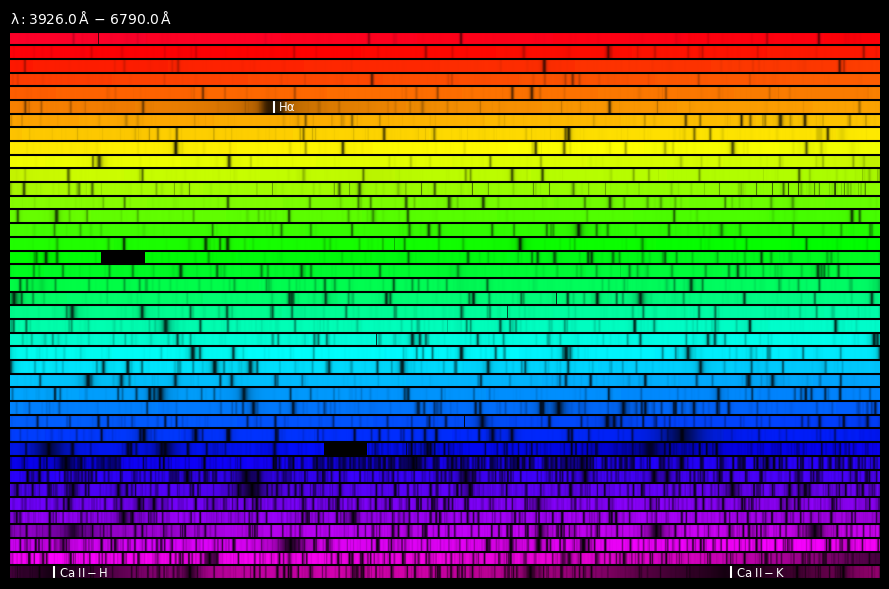

In [5]:
f, ax = spectrum(
    data[:,1], data[:,2], rows=40, show_lambda_range=true, windows="4MOST",
    line_indicators=[6562.8=>L"\rm H \alpha", 3968.5=>L"\rm Ca\ II - H", 3933.7=>L"\rm Ca\ II - K"], 
)
f.savefig("test.pdf");

In this example, we used the observed solar spectrum, cut it into the `4MOST` windows, and added a few line indicators, and saved it as PDF. Note that the black bars are placed at the end of each of the `4MOST` windows in this case. Note that the color scale is uniform because it is based on the index in the wavelength array. It can also be adjusted to the wavelength itself, which will result in jumps if there are jumps between windows.

[ Info: Cutting to 4MOST windows 3926Å - 4355Å, 5160Å - 5730Å, and 6100Å - 6790Å.
[ Info: Linear interpolating fluxes to uniform λ grid for each window...
[ Info: Colors computed based on wavelength values.
[ Info: Note that this means that points closer together will have a more similar color. This also means that gaps in the spectrum will cause gaps in the color.


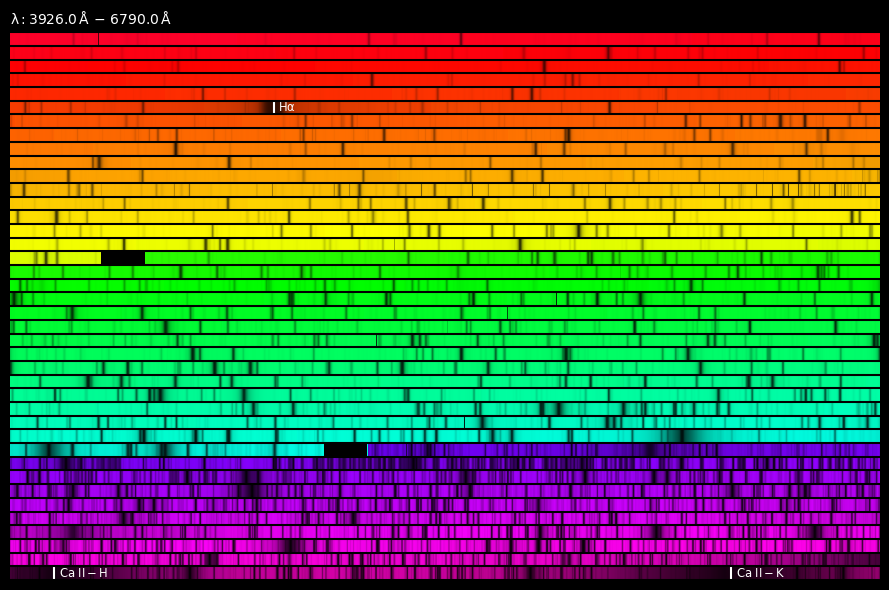

In [6]:
f, ax = spectrum(
    data[:,1], data[:,2], rows=40, show_lambda_range=true, windows="4MOST",
    line_indicators=[6562.8=>L"\rm H \alpha", 3968.5=>L"\rm Ca\ II - H", 3933.7=>L"\rm Ca\ II - K"], 
    color_spacing="wavelength"
);

We can also look at the entire spectrum, make the horizonal lines thinner and use more rows

[ Info: Linear interpolating fluxes to uniform λ grid for each window...
[ Info: Colors computed based on index in λ array.


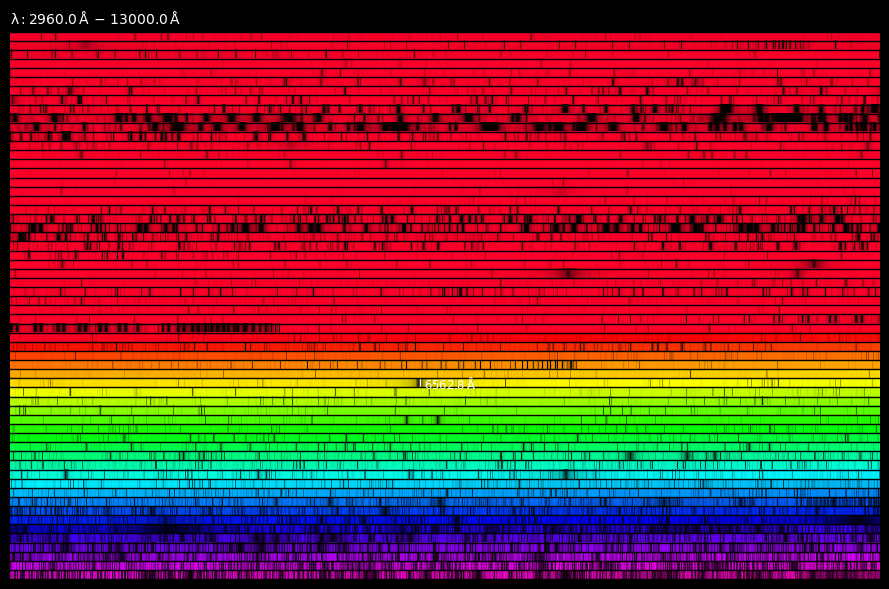

In [7]:
f, ax = spectrum(
    data[:,1], data[:,2], show_lambda_range=true, 
    line_indicators=[6562.8], λ_IR=7500, 
    separator_width=1, rows=60
)

# this looks a bit strange in the pdf viewer
f.savefig("more_rows.pdf")

# this looks fine
f.savefig("more_rows.png", dpi=300);

Here we also specified the range where the red part of the spectrum should start as $\lambda_{IR}$. Same can be done for the UV. 
Note that the image may be displayed a bit distoreted in VSCode, so have a look at the saved PDF. If it still looks strange, save a high-resolution PNG instead.

# Continuum Normalization
If you want to show a spectrum that is not continuum normalized, you will notice that there are bright and dark regions based on the continuum shape of your observation

In [11]:
data_norm = read_spectrum("hd61421.txt", skipstart=2);

[ Info: Linear interpolating fluxes to uniform λ grid for each window...
[ Info: Colors computed based on index in λ array.


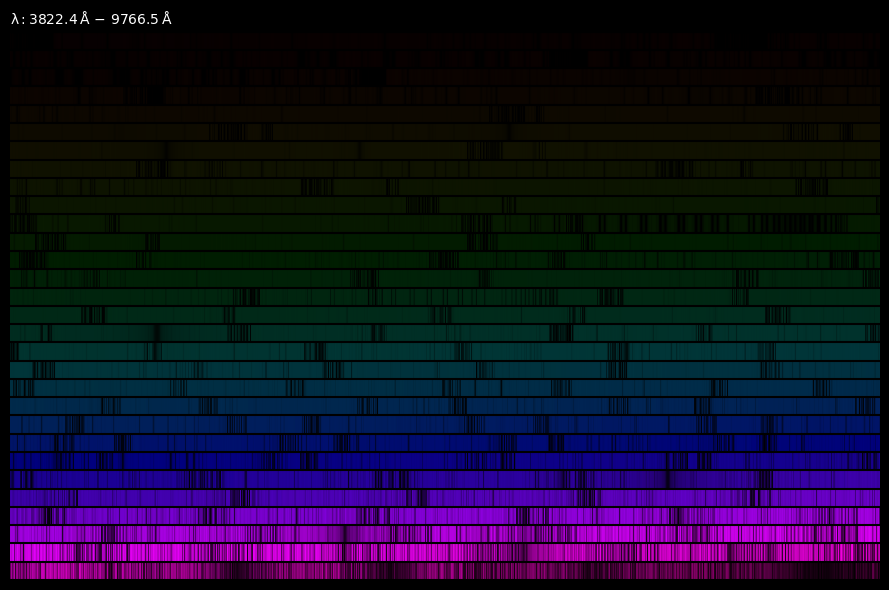

(<py Figure size 900x600 with 1 Axes>, <py Axes: >)

In [9]:
x = data_norm[:, 1]
y = data_norm[:, 2]
f, ax = spectrum(x, y)

The reason is seen when plotting the data

In [13]:
plt = SpectrumImage.matplotlib.pyplot;

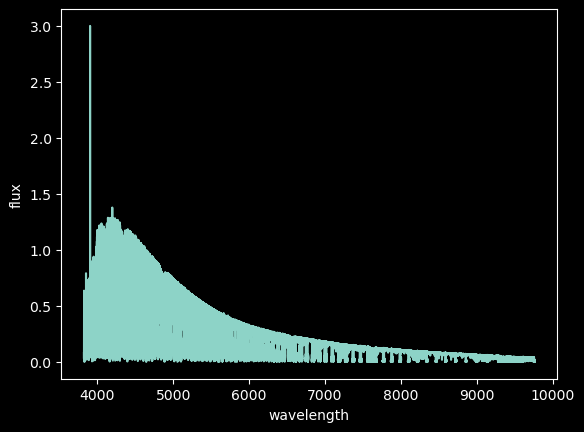

In [40]:
plt.close()
plt.plot(x, y)
plt.xlabel("wavelength")
plt.ylabel("flux");

For this purpose, I included a very simple continuum normalization routine. It is based on binning the spectrum and performing a Kernel Density estimate of the flux weighted distribution. If your overfitting the continuum, try reducing the number of bins or the bandwidth of the kernel until it works

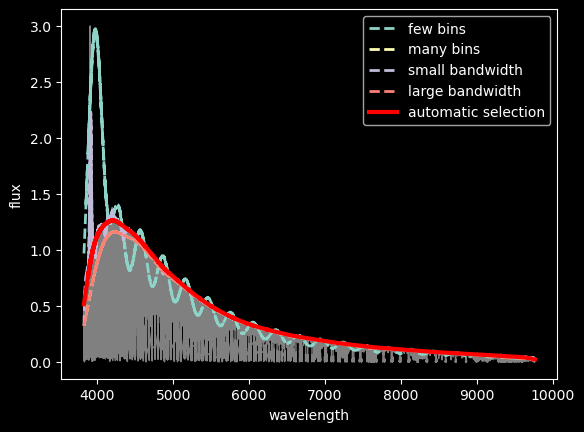

In [39]:
c_fewbins = continuum(x, y, nbins=20)
c_manybins = continuum(x, y, nbins=10000)
c_smallbandwidth = continuum(x, y, bandwidth=10)
c_largebandwidth = continuum(x, y, nbins=10000)
c_automatic = continuum(x, y)

plt.close()
plt.plot(x, y, color="0.5", lw=1)
plt.plot(x, c_fewbins, label="few bins", lw=2, ls="--")
plt.plot(x, c_manybins, label="many bins", lw=2, ls="--")
plt.plot(x, c_smallbandwidth, label="small bandwidth", lw=2, ls="--")
plt.plot(x, c_largebandwidth, label="large bandwidth", lw=2, ls="--")
plt.plot(x, c_automatic, label="automatic selection", lw=3, ls="-", color="red")
plt.xlabel("wavelength")
plt.ylabel("flux")
plt.legend();

In this case the automatic selection worked fine, but if the result looks weird then those are the parameters to tweek! You can alternatively of course always normalize the spectrum before using this package.

You get the normalized spectrum by dividing `y` by the continuum, or using the `normalize` function, which directly returns the normalized flux.

[ Info: Linear interpolating fluxes to uniform λ grid for each window...
[ Info: Colors computed based on index in λ array.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.34427009607836].


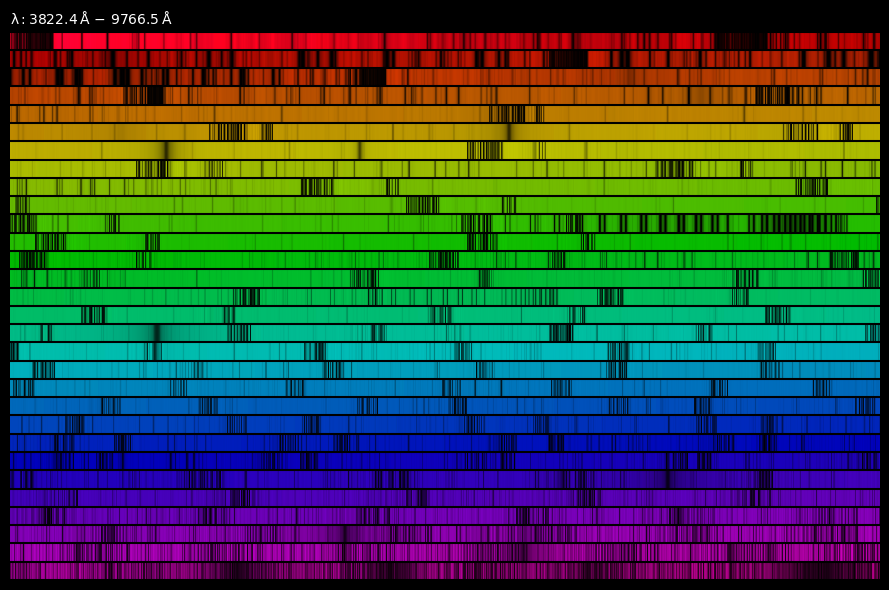

In [38]:
ynorm = normalize(x, y)
f, ax = spectrum(x, ynorm, F_high=1.3);